In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import plotly.express as px

In [127]:
data = pd.read_csv('/Users/petrmirosin/Documents/DANO Data/invest_db.csv', sep=';', decimal=',')

In [128]:
data

id        date  age education_level_cd marital_status_cd  \
0       1479787897  2024-04-20   33                NaN               UNM   
1        601760063  2024-02-01   29                GRD               UNM   
2         61175329  2024-02-10   38                SCH               MAR   
3       1411700618  2024-03-05   64                NaN               NaN   
4       2096755145  2024-02-10   31                NaN               UNM   
...            ...         ...  ...                ...               ...   
458365   324374950  2024-04-29   28                NaN               NaN   
458366  1903825748  2024-02-19   46                NaN               NaN   
458367  1825570440  2024-03-21   49                GRD               MAR   
458368   744042474  2024-02-13   34                GRD               MAR   
458369   349286973  2024-04-13   30                NaN               NaN   

        children_cnt  monthly_income_amt invest_utilization_dt  forts_flg  \
0                0.0             31272.0            2023-09-13          1   
1                0.0              6284.0            2021-03-29          0   
2                0.0              1904.0            2023-12-05          1   
3                0.0                 NaN            2021-09-16          0   
4                0.0                 NaN            2022-03-01          0   
...              ...                 ...                   ...        ...   
458365           0.0                 NaN            2021-04-23          1   
458366           0.0              2524.0            2020-12-10          1   
458367           0.0              6267.0            2021-03-11          1   
458368           1.0              4713.0            2020-05-22          1   
458369           0.0              1436.0            2021-10-27          0   

        margin_status_flg  ...  portf_fnd_amt  portf_opt_amt  portf_ore_amt  \
0                       0  ...          428.0            0.0            0.0   
1                       0  ...           23.0            0.0            0.0   
2                       0  ...          193.0            0.0            0.0   
3                       0  ...            0.0            0.0            0.0   
4                       0  ...            0.0            0.0            0.0   
...                   ...  ...            ...            ...            ...   
458365                  0  ...          148.0            0.0            0.0   
458366                  0  ...          429.0            0.0            0.0   
458367                  1  ...          467.0            0.0            0.0   
458368                  1  ...            0.0            0.0            0.0   
458369                  0  ...          368.0            0.0            0.0   

        ccr_balance_amt  cor_balance_amt  lon_balance_amt  posts  comments  \
0              -11298.0            541.0              0.0    0.0       0.0   
1                   NaN           8115.0              0.0    0.0       0.0   
2                   0.0             25.0              NaN    0.0       0.0   
3                   NaN             65.0              NaN    0.0       0.0   
4                   0.0              0.0              NaN    0.0       0.0   
...                 ...              ...              ...    ...       ...   
458365              NaN            310.0              NaN    0.0       0.0   
458366              0.0           5068.0              NaN    0.0       0.0   
458367              0.0            280.0              NaN    0.0       0.0   
458368        -194237.0            537.0         -34401.0    0.0       0.0   
458369              NaN             11.0              NaN    0.0       0.0   

        reacts  reads  
0          0.0    0.0  
1          0.0    0.0  
2          0.0    2.0  
3          0.0    0.0  
4          0.0    0.0  
...        ...    ...  
458365     0.0   21.0  
458366     0.0    6.0  
458367     0.0    7.0  
458368     0.0    0.0  
458369     0.0    0.0  

[45

In [46]:
data.shape

(458370, 51)

In [47]:
data = data.astype({
    "id": "int64",
    "age": "int64",
    "children_cnt": "float64",
    "monthly_income_amt": "float64",
    "in_payment_rub_amt": "float64",
    "out_payment_rub_amt": "float64",
    "uncovered_position_amt": "float64",
    "turnover_rus_bon_amt": "float64",
    "turnover_rus_sec_amt": "float64",
    "turnover_forts_amt": "float64",
    "turnover_cur_amt": "float64",
    "turnover_etf_amt": "float64",
    "turnover_fnd_amt": "float64",
    "turnover_opt_amt": "float64",
    "turnover_ore_prc_amt": "float64",
    "turnover_ore_sel_amt": "float64",
    "turnover_tracking_amt": "float64",
    "trade_order_rus_sec_cnt": "float64",
    "trade_order_rus_bon_cnt": "float64",
    "trade_order_forts_cnt": "float64",
    "trade_order_cur_cnt": "float64",
    "trade_order_etf_cnt": "float64",
    "trade_order_fnd_cnt": "float64",
    "trade_order_opt_cnt": "float64",
    "trade_order_ore_prc_cnt": "float64",
    "trade_order_ore_sel_cnt": "float64",
    "trade_order_tracking_cnt": "float64",
    "portf_total_amt": "float64",
    "portf_mex_amt": "float64",
    "portf_rus_sec_amt": "float64",
    "portf_rus_bon_amt": "float64",
    "initial_margin_amt": "float64",
    "portf_cur_amt": "float64",
    "portf_etf_amt": "float64",
    "portf_fnd_amt": "float64",
    "portf_opt_amt": "float64",
    "portf_ore_amt": "float64",
    "ccr_balance_amt": "float64",
    "cor_balance_amt": "float64",
    "lon_balance_amt": "float64",
    "posts": "float64",
    "comments": "float64",
    "reacts": "float64",
    "reads": "float64"
})

date_columns = [
    "date",
    "invest_utilization_dt" 
]
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

categorical_columns = [
    "education_level_cd",
    "marital_status_cd"
]
for col in categorical_columns:
    data[col] = data[col].astype("category")

binary_flags = [
    "forts_flg", "margin_status_flg", "qualified_investor_flg"
]
for col in binary_flags:
    data[col] = data[col].astype("bool")

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458370 entries, 0 to 458369
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        458370 non-null  int64         
 1   date                      458370 non-null  datetime64[ns]
 2   age                       458370 non-null  int64         
 3   education_level_cd        233460 non-null  category      
 4   marital_status_cd         267030 non-null  category      
 5   children_cnt              410310 non-null  float64       
 6   monthly_income_amt        355140 non-null  float64       
 7   invest_utilization_dt     458370 non-null  datetime64[ns]
 8   forts_flg                 458370 non-null  bool          
 9   margin_status_flg         458370 non-null  bool          
 10  qualified_investor_flg    458370 non-null  bool          
 11  in_payment_rub_amt        458370 non-null  float64       
 12  ou

In [36]:
numeric_stats = data.describe().T
numeric_stats['Range'] = numeric_stats['max'] - numeric_stats['min']
numeric_stats['Variance'] = data.var()

In [40]:
numeric_stats

count          mean           std          min  \
id                        458370.0  1.062470e+09  6.192610e+08      42390.0   
age                       458370.0  4.053367e+01  1.091754e+01         18.0   
children_cnt              410310.0  7.150691e-02  3.538062e-01          0.0   
monthly_income_amt        355140.0  4.511029e+03  6.157621e+03          0.0   
in_payment_rub_amt        458370.0  2.347745e+02  5.938802e+03          0.0   
out_payment_rub_amt       458370.0  1.624324e+02  6.057344e+03          0.0   
uncovered_position_amt    458370.0 -3.710260e+03  4.719558e+04   -3494045.0   
turnover_rus_bon_amt      458370.0  3.057194e+02  8.699956e+03          0.0   
turnover_rus_sec_amt      458370.0  3.332785e+03  6.578725e+04          0.0   
turnover_forts_amt        458370.0  1.626029e+03  4.293121e+04          0.0   
turnover_cur_amt          458370.0  2.213947e+01  8.409767e+02          0.0   
turnover_etf_amt          458370.0  1.453612e+02  5.013167e+03          0.0   
turnover_fnd_amt          458370.0  2.838205e+03  2.345231e+05          0.0   
turnover_opt_amt          458370.0  4.219471e+00  2.103947e+02          0.0   
turnover_ore_prc_amt      458370.0  1.633567e+01  1.057828e+03          0.0   
turnover_ore_sel_amt      458370.0  1.037982e+01  9.664341e+02          0.0   
turnover_tracking_amt     458370.0  1.706286e+02  2.814579e+03          0.0   
trade_order_rus_sec_cnt   458370.0  1.674481e+00  4.204399e+00          0.0   
trade_order_rus_bon_cnt   458370.0  3.199773e-01  1.593208e+00          0.0   
trade_order_forts_cnt     458370.0  1.406527e-01  1.295619e+00          0.0   
trade_order_cur_cnt       458370.0  7.010057e-02  5.296205e-01          0.0   
trade_order_etf_cnt       458370.0  4.651984e-01  1.533047e+00          0.0   
trade_order_fnd_cnt       458370.0  3.723411e-01  1.445725e+00          0.0   
trade_order_opt_cnt       458370.0  7.557214e-02  8.422086e-01          0.0   
trade_order_ore_prc_cnt   458370.0  1.470646e-02  2.553267e-01          0.0   
trade_order_ore_sel_cnt   458370.0  5.133408e-03  1.653818e-01          0.0   
trade_order_tracking_cnt  458370.0  1.112060e+00  3.496313e+00          0.0   
portf_total_amt           458370.0  6.057011e+04  3.204279e+05    -942382.0   
portf_mex_amt             458370.0  4.163239e+04  4.027756e+05  -55440642.0   
portf_rus_sec_amt         458370.0  1.491359e+04  5.452302e+05 -108973196.0   
portf_rus_bon_amt         458370.0  2.097743e+04  2.057887e+05          0.0   
initial_margin_amt        458370.0  5.844670e+02  1.018266e+04          0.0   
portf_cur_amt             458370.0 -8.486097e+04  1.147016e+06  -87908501.0   
portf_etf_amt             458370.0  4.029272e+03  5.761445e+04          0.0   
portf_fnd_amt             458370.0  1.199558e+03  4.281424e+04   -5879424.0   
portf_opt_amt             458370.0  1.131863e+01  2.004548e+02     -23461.0   
portf_ore_amt             458370.0  9.207060e+02  8.754344e+03          0.0   
ccr_balance_amt           291342.0 -4.789691e+04  9.786048e+04   -1098329.0   
cor_balance_amt           457308.0  1.140651e+04  6.771688e+04    -670404.0   
lon_balance_amt           148503.0 -1.631091e+05  7.205143e+05  -14839006.0   
posts                     439050.0  1.824394e-02  3.288018e-01          0.0   
comments                  439050.0  1.120647e-01  2.219424e+00          0.0   
reacts                    439050.0  2.462134e-01  4.442220e+00          0.0   
reads                     439050.0  4.253577e+00  1.829010e+01          0.0   

                                  25%           50%           75%  \
id                        523467735.0  1.053416e+09  1.613187e+09   
age                              33.0  4.000000e+01  4.700000e+01   
children_cnt                      0.0  0.000000e+00  0.000000e+00   
monthly_income_amt             1722.0  3.143000e+03  5.025000e+03   
in_payment_rub_amt                0.0  0.000000e+00  0.000000e+00   
out_payment_rub_amt               0.0  0.000000e+00  0.0000

In [52]:
modes = data.mode().iloc[0]

In [54]:
modes

id                                        42390
date                        2024-02-01 00:00:00
age                                          40
education_level_cd                          GRD
marital_status_cd                           MAR
children_cnt                                  0
monthly_income_amt                            0
invest_utilization_dt       2023-12-29 00:00:00
forts_flg                                  True
margin_status_flg                         False
qualified_investor_flg                    False
in_payment_rub_amt                            0
out_payment_rub_amt                           0
uncovered_position_amt                        0
turnover_rus_bon_amt                          0
turnover_rus_sec_amt                          0
turnover_forts_amt                            0
turnover_cur_amt                              0
turnover_etf_amt                              0
turnover_fnd_amt                              0
turnover_opt_amt                        

In [58]:
categorical_columns = data.select_dtypes(include=['object', 'category', 'bool']).columns
class_balance = data[categorical_columns].apply(lambda x: x.value_counts(normalize=True))

In [59]:
print("\nБаланс классов для категориальных данных:")
for col in categorical_columns:
    print(f"\nКолонка: {col}")
    print(tabulate(class_balance[col].reset_index(), headers=["Значение", "Доля"], tablefmt="fancy_grid"))


Баланс классов для категориальных данных:

Колонка: education_level_cd
╒════╤════════════╤═══════════════╕
│    │ Значение   │          Доля │
╞════╪════════════╪═══════════════╡
│  0 │ False      │ nan           │
├────┼────────────┼───────────────┤
│  1 │ True       │ nan           │
├────┼────────────┼───────────────┤
│  2 │ ACD        │   0.0123362   │
├────┼────────────┼───────────────┤
│  3 │ CIV        │ nan           │
├────┼────────────┼───────────────┤
│  4 │ DIV        │ nan           │
├────┼────────────┼───────────────┤
│  5 │ GRD        │   0.613338    │
├────┼────────────┼───────────────┤
│  6 │ MAR        │ nan           │
├────┼────────────┼───────────────┤
│  7 │ MGR        │   0.000385505 │
├────┼────────────┼───────────────┤
│  8 │ PGR        │   0.037394    │
├────┼────────────┼───────────────┤
│  9 │ SCH        │   0.201619    │
├────┼────────────┼───────────────┤
│ 10 │ UGR        │   0.134927    │
├────┼────────────┼───────────────┤
│ 11 │ UNM        │ nan     

In [61]:
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_table = pd.DataFrame({"Missing Values": missing_values, "Percent": missing_percent})

outliers = data.select_dtypes(include=['float64', 'int64']).apply(lambda x: np.sum((x < (x.mean() - 3*x.std())) | (x > (x.mean() + 3*x.std()))))
outliers_table = pd.DataFrame(outliers, columns=["Outliers"])

In [62]:
print("\nПропущенные значения:")
print(tabulate(missing_table, headers="keys", tablefmt="fancy_grid"))



Пропущенные значения:
╒══════════════════════════╤══════════════════╤═══════════╕
│                          │   Missing Values │   Percent │
╞══════════════════════════╪══════════════════╪═══════════╡
│ id                       │                0 │  0        │
├──────────────────────────┼──────────────────┼───────────┤
│ date                     │                0 │  0        │
├──────────────────────────┼──────────────────┼───────────┤
│ age                      │                0 │  0        │
├──────────────────────────┼──────────────────┼───────────┤
│ education_level_cd       │           224910 │ 49.0673   │
├──────────────────────────┼──────────────────┼───────────┤
│ marital_status_cd        │           191340 │ 41.7436   │
├──────────────────────────┼──────────────────┼───────────┤
│ children_cnt             │            48060 │ 10.485    │
├──────────────────────────┼──────────────────┼───────────┤
│ monthly_income_amt       │           103230 │ 22.5211   │
├────────────────

In [63]:
print("\nКоличество выбросов:")
print(tabulate(outliers_table, headers="keys", tablefmt="fancy_grid"))


Количество выбросов:
╒══════════════════════════╤════════════╕
│                          │   Outliers │
╞══════════════════════════╪════════════╡
│ id                       │          0 │
├──────────────────────────┼────────────┤
│ age                      │       1530 │
├──────────────────────────┼────────────┤
│ children_cnt             │       8910 │
├──────────────────────────┼────────────┤
│ monthly_income_amt       │       5490 │
├──────────────────────────┼────────────┤
│ in_payment_rub_amt       │        865 │
├──────────────────────────┼────────────┤
│ out_payment_rub_amt      │        638 │
├──────────────────────────┼────────────┤
│ uncovered_position_amt   │       2039 │
├──────────────────────────┼────────────┤
│ turnover_rus_bon_amt     │        776 │
├──────────────────────────┼────────────┤
│ turnover_rus_sec_amt     │       1148 │
├──────────────────────────┼────────────┤
│ turnover_forts_amt       │        973 │
├──────────────────────────┼────────────┤
│ turnover_c

In [67]:
correlations = data.corr()
plt.figure(figsize=(50, 30), dpi=180)
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Корреляционная матрица')
plt.show()

In [119]:
correlations_melted = correlations.stack().reset_index()

correlations_melted.columns = ['Переменная 1', 'Переменная 2', 'Корреляция']
correlations_melted = correlations_melted[correlations_melted['Переменная 1'] != correlations_melted['Переменная 2']]
correlations_melted = correlations_melted[correlations_melted['Корреляция'].abs() >= 0.5]
correlations_melted = correlations_melted.sort_values(by='Корреляция', ascending=False)
correlations_melted = correlations_melted[correlations_melted['Переменная 1'] != correlations_melted['Переменная 2']]

In [120]:
correlations_melted

Переменная 1       Переменная 2  Корреляция
1443    portf_total_amt  portf_rus_bon_amt    0.872513
1581  portf_rus_bon_amt    portf_total_amt    0.872513

In [77]:
fig = px.imshow(
    correlations,
    text_auto=".2f",
    color_continuous_scale="viridis",
    title="Корреляционная матрица"
)

fig.update_layout(
    width=800,
    height=800,
)

fig.show()

In [ ]:
correlations

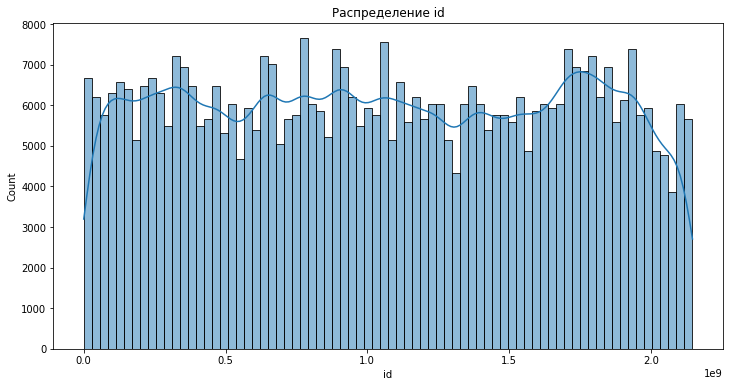

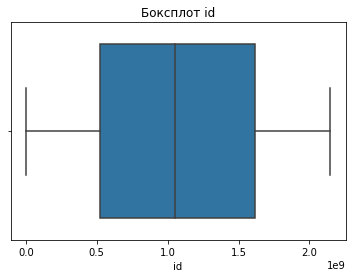

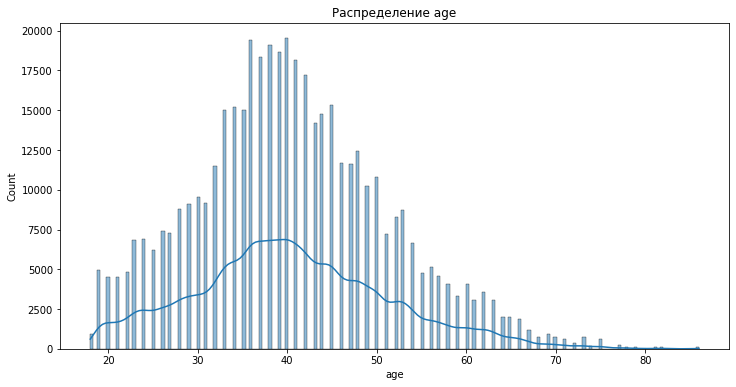

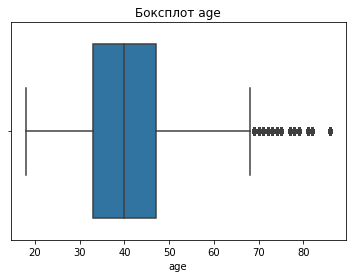

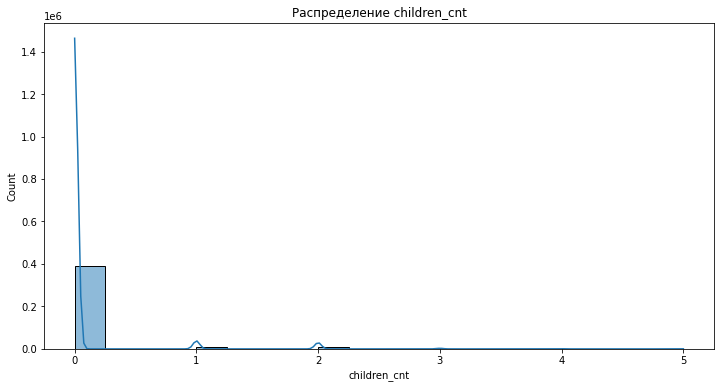

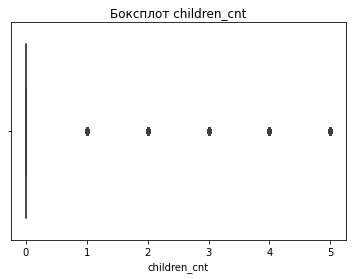

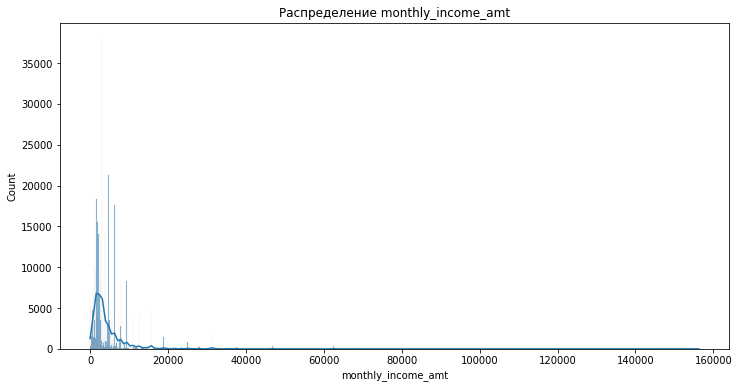

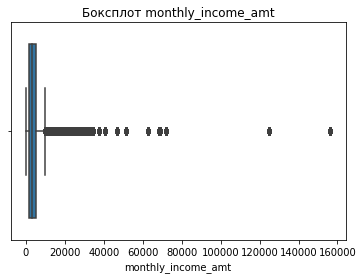

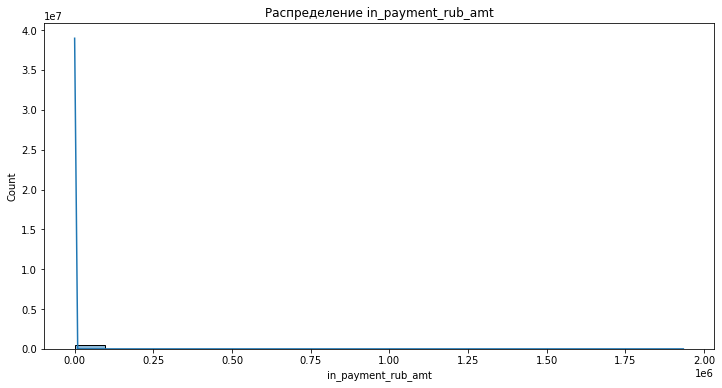

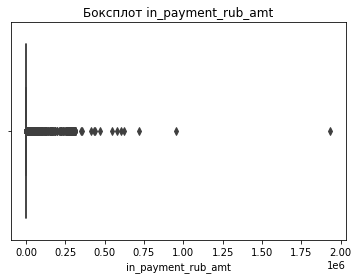

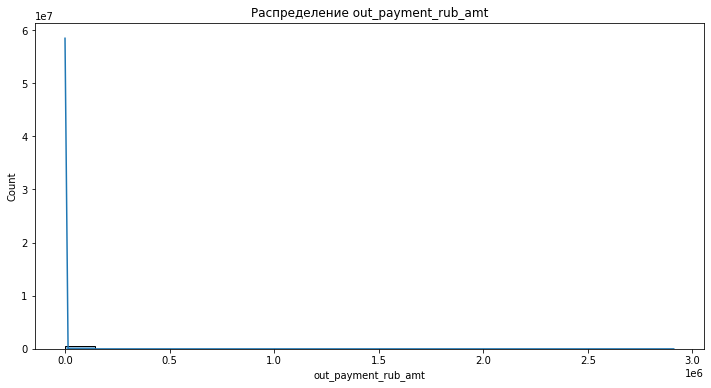

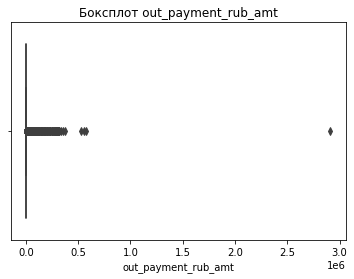

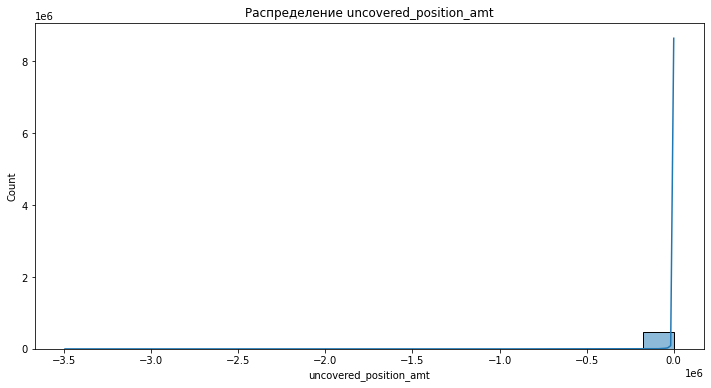

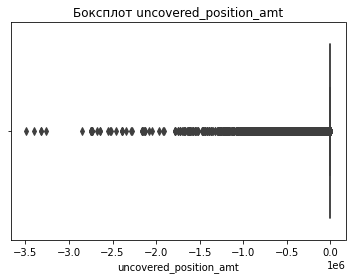

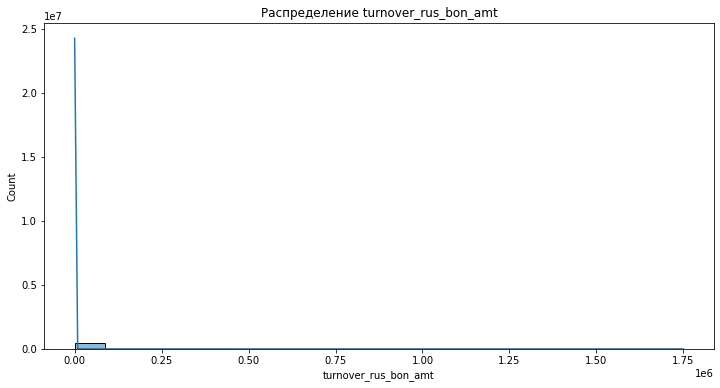

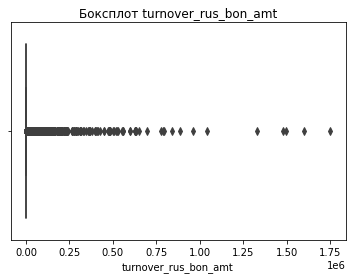

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fb8a12a9488> (for post_execute):


KeyboardInterrupt: 

In [78]:
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Распределение {column}')
    plt.show()

    sns.boxplot(x=data[column])
    plt.title(f'Боксплот {column}')
    plt.show()

In [121]:
interesting_vars = pd.unique(
    correlations_melted[['Переменная 1', 'Переменная 2']].values.ravel()
)

In [124]:
plot_data = data[interesting_vars]

In [126]:
sns.pairplot(plot_data)
plt.show()

KeyboardInterrupt: 